![Banner Intro](banner.png)

# Tabla de Contenido
---
1. [Análisis Exploratorio de Datos - EDA](#id1)
    1. [Ubicación Geográfica](#id11)
    2. [Información General](#id12)
    3. [Población Diferencial](#id13)
    4. [Tejido Empresarial](#id14)
    5. [Panorama Productivo](#id15)
    6. [Talento Humano](#id16)
    7. [Exportaciones](#id17)
    8. [Inversiones](#id18)
    9. [Turismo](#id19)

# Análisis Exploratorio de Datos - EDA <a name="id1"></a>
---

In [ ]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "data"

# Ubicación Geográfica <a name="id11"></a>
---
**Fuente: DIVIPOLA Marzo 2024 del DANE**
Se tomó la latitud y longitud de cada municipio de Colombia, disponible en la Codificación de la División Político Administrativa de Colombia - DIVIPOLA Marzo 2024 del DANE.

In [ ]:
ubicacion_df = pd.read_csv(file_path+'/DIVIPOLA_Municipios.csv')
ubicacion_df.head(), ubicacion_df.info(), ubicacion_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod. Departamento    1122 non-null   int64  
 1   Nombre Departamento  1122 non-null   object 
 2   Cod. Municipio       1122 non-null   int64  
 3   Nombre Municipio     1122 non-null   object 
 4   Tipo                 1122 non-null   object 
 5   LATITUD              1122 non-null   float64
 6   LONGITUD             1122 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 61.5+ KB


(   Cod. Departamento Nombre Departamento  Cod. Municipio Nombre Municipio  \
 0                  5           ANTIOQUIA            5001         MEDELLÍN   
 1                  5           ANTIOQUIA            5002        ABEJORRAL   
 2                  5           ANTIOQUIA            5004         ABRIAQUÍ   
 3                  5           ANTIOQUIA            5021       ALEJANDRÍA   
 4                  5           ANTIOQUIA            5030            AMAGÁ   
 
         Tipo   LATITUD   LONGITUD  
 0  Municipio  6.257590 -75.611031  
 1  Municipio  5.803728 -75.438474  
 2  Municipio  6.627569 -76.085978  
 3  Municipio  6.365534 -75.090597  
 4  Municipio  6.032922 -75.708003  ,
 None,
        Cod. Departamento  Cod. Municipio      LATITUD     LONGITUD
 count        1122.000000     1122.000000  1122.000000  1122.000000
 mean           38.222816    38656.544563     5.603231   -74.641414
 std            26.538214    26524.369769     2.648580     1.678501
 min             5.000000   

In [ ]:
from IPython.display import IFrame

# Geographical Analysis
# Create a folium map to visualize the geographic distribution of municipalities
mapa_colombia = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Add points for each municipality based on latitude and longitude
for _, row in ubicacion_df.iterrows():
    folium.Marker(
        location=[row['LATITUD'], row['LONGITUD']],
        popup=row['Nombre Municipio'],
    ).add_to(mapa_colombia)

# Save map to an HTML file
mapa_colombia.save(file_path+'/outputs/mapa_municipios_colombia.html')

# Embed the map in the Jupyter notebook
IFrame(file_path+'/outputs/mapa_municipios_colombia.html', width=700, height=500)

# Información General <a name="id12"></a>
---
En esta sección, se identificó si el municipio hace parte de los Programas de Desarrollo con Enfoque Territorial (PDET), si pertenece a las Zonas Más Afectadas por el Conflicto Armado (ZOMAC) y el tamaño de su población, con el fin de identificar si es un territorio de menos de 200.000 habitantes.
**Fuente: OXI, [Consultoría Obras por Impuestos](https://www.obrasximpuestos.com/)**

## Programas de Desarrollo con Enfoque Territorial (PDET)
Son instrumentos de gestión y planificación para priorizar la implementación de los planes sectoriales y programas dentro de la Reforma Rural Integral. Los municipios priorizados para estos programas se encuentran plasmados en la Ley 893 de 2017 y corresponden a 170 municipios considerados como los más afectados por la violencia, la pobreza, las economías ilícitas y la debilidad institucional. Mediante la implementación de la Reforma Rural Integral se buscan sentar las bases para la transformación del campo, generar desarrollo social, reducir los índices de pobreza y crear desarrollo integral de la sociedad mediante proyectos de inversión que generen bienestar para la población. Además existen incentivos tributarios para fomentar el crecimiento económico en dichos territorios.

## Zonas Más Afectadas por el Conflicto Armado (ZOMAC)
como su nombre lo dice, son un conjunto de municipios que agrupa las zonas del país más afectadas por el conflicto armado. Las empresas ubicadas en estas zonas cuentan con beneficios e incentivos tributarios, los cuales están descritos en los artículos 235 al 237 de la Ley 2819 de 2016 y el Decreto 1650 de 2017.

In [ ]:
pdet_zomac_df = pd.read_csv(file_path+'/PDET_y_ZOMAC.txt',sep='|')

#Para efectos de data quality se eliminan las columnas Departamento y Municipio
pdet_zomac_df.drop(columns=['Departamento','Municipio'], inplace=True)

#Para los municipios que no son PDET se reemplaza NaN por 0
pdet_zomac_df.fillna(0, inplace=True)
pdet_zomac_df.head(100)

,Cod. Municipio,Subregión PDET,ZOMAC
0,5001,0,0
1,5002,0,1
2,5004,0,1
3,5021,0,1
4,5030,0,0
...,...,...,...
95,5664,0,0
96,5665,URABÁ ANTIOQUEÑO,1
97,5667,0,1
98,5670,0,0


# Población Diferencial <a name="id13"></a>
---
Con el fin de caracterizar la población diferencial residente en cada municipio de Colombia, se recurrió a las siguientes fuentes de información:

## Población Municipal
**Fuente: Proyecciones de población municipal por área, sexo y edad para 2024, DANE**

Permite identificar el porcentaje de la población que corresponde a mujeres y a jóvenes entre 14 y 28 años (Ley 1622 de 2013).

In [ ]:
proyecciones_poblacion_df = pd.read_csv(file_path+'/Proyecciones_poblacion.txt', sep='|')

#Para efectos de data quality se eliminan las columnas Departamento y Municipio
proyecciones_poblacion_df.drop(columns=['Departamento','Municipio'], inplace=True)

proyecciones_poblacion_df.head()

,Cod. Municipio,AÑO,Población municipio,Total Hombres,Total Mujeres,% mujeres municipio,% jóvenes municipio
0,5001,2024,2616335,1232017,1384318,"52,91057911161988","23,49217512283404"
1,5002,2024,21468,11230,10238,"47,689584497857275","19,638531768213156"
2,5004,2024,2855,1549,1306,"45,74430823117338","20,875656742556917"
3,5021,2024,4955,2454,2501,"50,474268415741676","19,414732593340062"
4,5030,2024,32412,15890,16522,"50,97494755029002","22,328150067876095"


## Población con Discapacidad y Grupos Étnicos
**Fuente: Censo Nacional de Población y Vivienda 2018, DANE**

Permite identificar el porcentaje de la población que corresponde a mujeres y a jóvenes entre 14 y 28 años (Ley 1622 de 2013).

In [ ]:
datos_censo_df = pd.read_csv(file_path+'/Datos_censo_por_municipios.txt', sep='|')
datos_censo_df.columns = ['Cod. Municipio', 'CON_DISCAPACIDAD', 'ETNICO', 'EDUC_MEDIA', 'TECNICO/TECNOLOGO', 'PREGRADO', 'POSGRADO', 'Mayor20', 'TOTAL', 'PET', 'OCU', 'DSO', 'FT', '% pobl. con discapacidad municipio', '% grupos étnicos municipio', '% pobl. con educación media municipio', '% pobl. con edu. técnica/tecnología municipio', '% pobl. con pregrado municipio', '% pobl. con posgrado municipio', 'TGP', 'Tasa ocupación', 'Tasa desempleo']

# Convert percentage columns to float
datos_censo_df['% pobl. con discapacidad municipio'] = datos_censo_df['% pobl. con discapacidad municipio'].str.replace(',', '.').astype(float)
datos_censo_df['% grupos étnicos municipio'] = datos_censo_df['% grupos étnicos municipio'].str.replace(',', '.').astype(float)
datos_censo_df['% pobl. con educación media municipio'] = datos_censo_df['% pobl. con educación media municipio'].str.replace(',', '.').astype(float)
datos_censo_df['% pobl. con edu. técnica/tecnología municipio'] = datos_censo_df['% pobl. con edu. técnica/tecnología municipio'].str.replace(',', '.').astype(float)
datos_censo_df['% pobl. con pregrado municipio'] = datos_censo_df['% pobl. con pregrado municipio'].str.replace(',', '.').astype(float)
datos_censo_df['% pobl. con posgrado municipio'] = datos_censo_df['% pobl. con posgrado municipio'].str.replace(',', '.').astype(float)
datos_censo_df['TGP'] = datos_censo_df['TGP'].str.replace(',', '.').astype(float)
datos_censo_df['Tasa ocupación'] = datos_censo_df['Tasa ocupación'].str.replace(',', '.').astype(float)
datos_censo_df['Tasa desempleo'] = datos_censo_df['Tasa desempleo'].str.replace(',', '.').astype(float)
datos_censo_df.head()

,Cod. Municipio,CON_DISCAPACIDAD,ETNICO,EDUC_MEDIA,TECNICO/TECNOLOGO,PREGRADO,POSGRADO,Mayor20,TOTAL,PET,...,FT,% pobl. con discapacidad municipio,% grupos étnicos municipio,% pobl. con educación media municipio,% pobl. con edu. técnica/tecnología municipio,% pobl. con pregrado municipio,% pobl. con posgrado municipio,TGP,Tasa ocupación,Tasa desempleo
0,5001,148803,61560,548969,233933,263487,82183,1781943,2372330,1966127,...,1194353,6.272441,2.594917,30.807327,13.127973,14.786500,4.611988,60.746483,54.678462,9.989090
1,5002,2824,64,1736,398,293,148,12445,17599,14051,...,7272,16.046366,0.363657,13.949377,3.198072,2.354359,1.189233,51.754324,50.985695,1.485149
2,5004,361,44,365,100,48,20,1512,2159,1724,...,859,16.720704,2.037981,24.140212,6.613757,3.174603,1.322751,49.825986,48.085847,3.492433
3,5021,311,12,441,203,109,28,2660,3839,2982,...,1527,8.101068,0.312581,16.578947,7.631579,4.097744,1.052632,51.207243,50.201207,1.964637
4,5030,2420,139,5230,1458,735,189,19493,26821,21783,...,11626,9.022781,0.518251,26.830144,7.479608,3.770584,0.969579,53.371896,49.437635,7.371409


## Pobreza y Hogares Ocupados Informales
**Fuente: Medida de Pobreza Multidimensional Municipal 2018,DANE**

Permite identificar el porcentaje de población con discapacidad y el porcentaje de población correspondiente a grupos étnicos (Indígena, Gitano o Rom, Raizal del Archipiélago de San Andrés, Providencia y Santa Catalina, Palenquero de San Basilio, Negro, Mulato, Afrodescendiente, Afrocolombiano).

In [ ]:
ipm_df = pd.read_csv(file_path+'/IPM.txt', sep='|')
ipm_df.columns = ['Cod. Municipio', 'Departamento', 'Municipio', '% pobreza municipio', '% informalidad municipio']

#Para efectos de data quality se eliminan las columnas Departamento y Municipio
ipm_df.drop(columns=['Departamento','Municipio'], inplace=True)

ipm_df['% pobreza municipio'] = ipm_df['% pobreza municipio'].str.replace(',', '.').astype(float)
ipm_df['% informalidad municipio'] = ipm_df['% informalidad municipio'].str.replace(',', '.').astype(float)
ipm_df.head()

,Cod. Municipio,% pobreza municipio,% informalidad municipio
0,5001,12.8,71.0
1,5002,40.6,87.5
2,5004,34.8,87.6
3,5021,31.9,87.1
4,5030,22.9,69.5


## Análisis de Información SocioEconómica de la Población Municipal
A través del merge de la información de ubicación, proyección de población municipal,población con discapacidad, grupos étnicos, índices de pobreza y hogares ocupados informales.

In [ ]:
merged_full_df = pd.merge(ubicacion_df, pdet_zomac_df, on='Cod. Municipio', how='inner')
merged_full_df = pd.merge(merged_full_df, proyecciones_poblacion_df, on='Cod. Municipio', how='inner')
merged_full_df = pd.merge(merged_full_df, datos_censo_df, on='Cod. Municipio', how='inner')
merged_full_df = pd.merge(merged_full_df, ipm_df, on='Cod. Municipio', how='inner')
merged_full_df.head()

,Cod. Departamento,Nombre Departamento,Cod. Municipio,Nombre Municipio,Tipo,LATITUD,LONGITUD,Subregión PDET,ZOMAC,AÑO,...,% grupos étnicos municipio,% pobl. con educación media municipio,% pobl. con edu. técnica/tecnología municipio,% pobl. con pregrado municipio,% pobl. con posgrado municipio,TGP,Tasa ocupación,Tasa desempleo,% pobreza municipio,% informalidad municipio
0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,6.257590,-75.611031,0,0,2024,...,2.594917,30.807327,13.127973,14.786500,4.611988,60.746483,54.678462,9.989090,12.8,71.0
1,5,ANTIOQUIA,5002,ABEJORRAL,Municipio,5.803728,-75.438474,0,1,2024,...,0.363657,13.949377,3.198072,2.354359,1.189233,51.754324,50.985695,1.485149,40.6,87.5
2,5,ANTIOQUIA,5004,ABRIAQUÍ,Municipio,6.627569,-76.085978,0,1,2024,...,2.037981,24.140212,6.613757,3.174603,1.322751,49.825986,48.085847,3.492433,34.8,87.6
3,5,ANTIOQUIA,5021,ALEJANDRÍA,Municipio,6.365534,-75.090597,0,1,2024,...,0.312581,16.578947,7.631579,4.097744,1.052632,51.207243,50.201207,1.964637,31.9,87.1
4,5,ANTIOQUIA,5030,AMAGÁ,Municipio,6.032922,-75.708003,0,0,2024,...,0.518251,26.830144,7.479608,3.770584,0.969579,53.371896,49.437635,7.371409,22.9,69.5


### Pobreza vs PDET

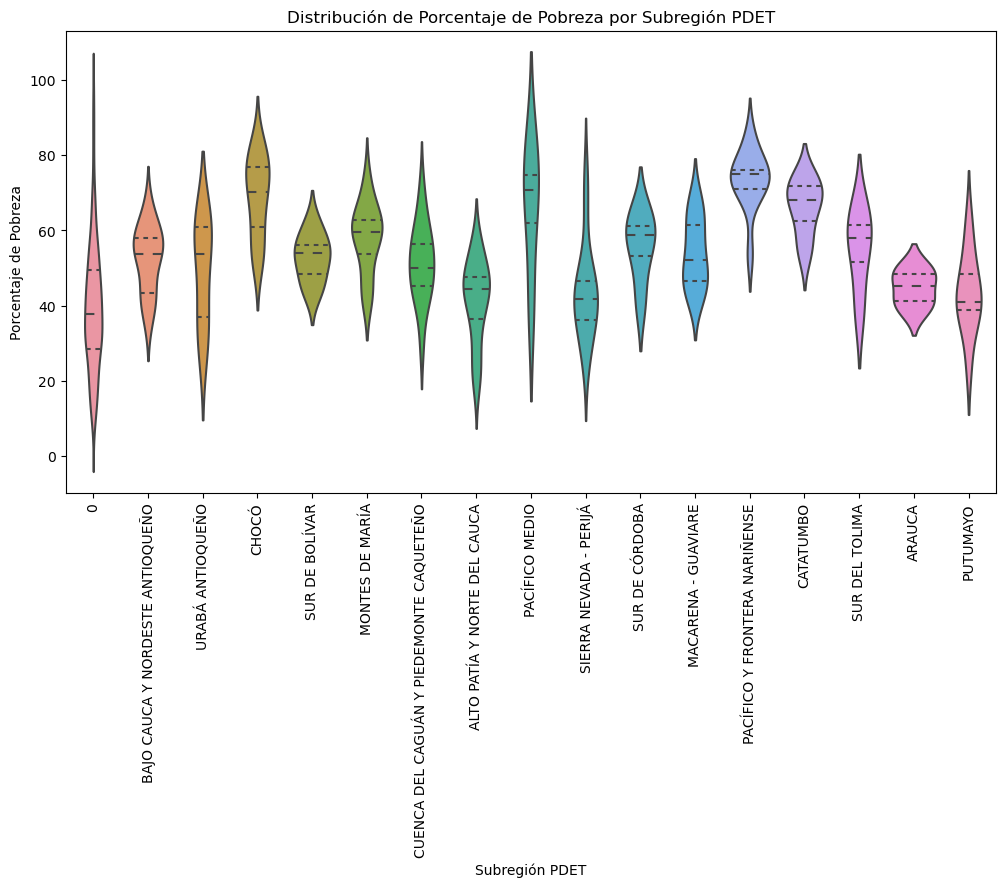

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Subregión PDET', y='% pobreza municipio', data=merged_full_df, inner='quartile')
plt.xlabel('Subregión PDET')
plt.xticks(rotation=90)
plt.ylabel('Porcentaje de Pobreza')
plt.title('Distribución de Porcentaje de Pobreza por Subregión PDET')
plt.show()

## Pobreza vs ZOMAC

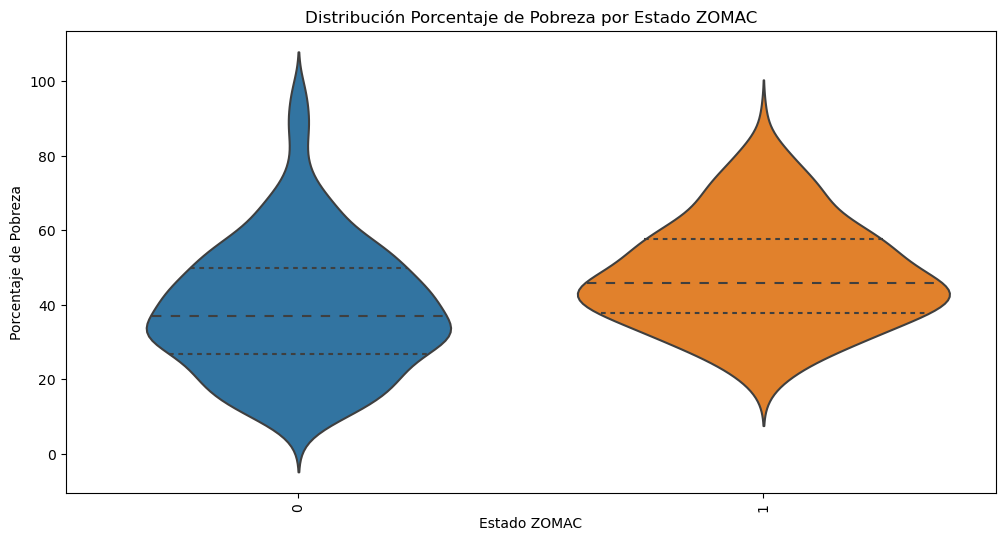

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='ZOMAC', y='% pobreza municipio', data=merged_full_df, inner='quartile')
plt.xlabel('Estado ZOMAC')
plt.xticks(rotation=90)
plt.ylabel('Porcentaje de Pobreza')
plt.title('Distribución Porcentaje de Pobreza por Estado ZOMAC')
plt.show()

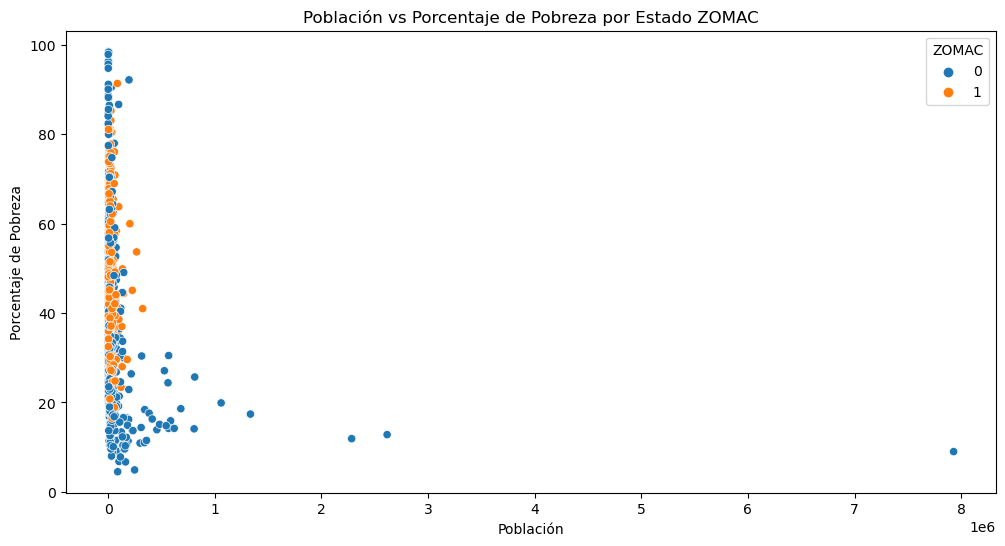

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Población municipio', y='% pobreza municipio', hue='ZOMAC', data=merged_full_df)
plt.xlabel('Población')
plt.ylabel('Porcentaje de Pobreza')
plt.title('Población vs Porcentaje de Pobreza por Estado ZOMAC')
plt.show()

# Tejido Empresarial <a name="id14"></a>
---
**Fuente: Gerencia de Inteligencia Comercial de ProColombia**

Se consultó la base "Tejido Empresarial de Colombia" construída por la Coordinación de Analítica - Gerencia de Inteligencia Comercial de ProColombia. Esta base tuvo en cuenta las siguientes fuentes:

- Registro Único Empresarial y Social (RUES) con corte a mayo de 2023, que incluyó empresas con renovación de matrícula mercantil desde el año 2019 en adelante, clasificadas como “sociedad o persona jurídica principal” y en estado “activa”.
- Directorio empresarial del DANE con corte a abril 2023.
- Las 10.000 empresas más grandes de Colombia, Superintendencia de Sociedades (2021).
- Base de exportaciones de bienes, DANE-DIAN (2013-2022).
- CRM de ProColombia (2013-2022).

Es importante aclarar que esta base se enfoca en personas jurídicas principales (no tiene en cuenta sucursales). Aunque también se encuentran algunas personas naturales provenientes de la base de exportaciones de bienes y/o del CRM de ProColombia, estos casos solo representan el 2% del total de empresas que se identificaron para Colombia.

En el proceso de construcción de la base "Tejido Empresarial de Colombia", cada una de las cinco fuentes previamente mencionadas recibió un tratamiento que consistió en la limpieza interna, con el propósito de asegurar la precisión y la calidad de la información contenida. Para ello se realizó decodificación de variables, unificación de unidades de medida, unificación de categorías y se analizaron y ajustaron valores extremos, datos inconsistentes y duplicados. Además, se unificó el NIT y la razón social de las empresas utilizando algoritmos avanzados de procesamiento de lenguaje natural (PLN).

Las cinco fuentes se unieron con el fin de consolidar un registro amplio del tejido empresarial. Se efectuó la identificación de empresas presentes en múltiples fuentes a través de su NIT o mediante el algoritmo de PLN y se tomaron las siguientes decisiones frente a variables existentes en varias fuentes de datos:

- En cuanto a la asignación de la razón social, se inició con el nombre proporcionado por el RUES; en caso de no disponer de este, se recurrió al suministrado por la Superintendencia de Sociedades; de no estar, se tomó el del Directorio empresarial del DANE, seguido por la base de exportaciones de bienes DANE-DIAN y finalizando con la razón social registrada en el CRM de ProColombia.
- Respecto a los datos de ubicación geográfica y actividad económica de las empresas, la primacía la tuvo el RUES. Solo si la empresa no figuraba en el RUES, se recurrió a los datos proporcionados por la Superintendencia de Sociedades y, en ausencia de información en ambos registros, se optó por la información contenida en el Directorio empresarial del DANE.
- Para la información de contacto, que incluye dirección, teléfono y correo electrónico, se realizó una integración y consolidación de la información proveniente del RUES, la Superintendencia de Sociedades y el Directorio empresarial del DANE, para garantizar una base de datos de contacto completa y fiable.
- En lo que atañe a los datos de activos, ingresos operacionales, utilidad y la identificación de si es sucursal de sociedad extranjera, se priorizó la información validada por la Superintendencia de Sociedades. En los casos donde no estaba disponible esta fuente, se tomaron los datos registrados en el RUES. Cabe destacar que el Directorio empresarial del DANE no dispone de estas variables.
- Para las cifras de exportaciones de bienes se utilizó la base de exportaciones de bienes DANE-DIAN, mientras que para las exportaciones de servicios se recurrió a la información de negocios provista por el CRM de ProColombia.

**Tamaño de la empresa:**

En la base "Tejido Empresarial de Colombia" se determinó el tamaño de las empresas con base en el Decreto 957 de 2019, donde la clasificación se realiza según la actividad económica y el nivel de ingresos de la empresa:

- Con base en el decreto, se hizo el cálculo para las 10.000 empresas más grandes de Colombia, fuente Superintendencia de Sociedades.
- Para el resto de las empresas, se tomó el tamaño informado por el RUES con corte a mayo de 2023, donde cada cámara de comercio se encarga de realizar el cálculo con base en el Decreto 957 de 2019.

La categoría "No determinado" corresponde a empresas que no tienen su clasificación de tamaño en el RUES o que provienen de fuentes de información como Directorio Empresarial del DANE, Base de exportaciones de bienes DANE-DIAN o CRM de ProColombia donde no se encuentra información para realizar la clasificación por tamaño.

In [ ]:
tejido_empresarial = pd.read_csv(file_path+'/Tejido_Municipios.txt', sep='|',low_memory=False)
tejido_empresarial.head()

,Cod. Depto,Departamento,Cod. Municipio,Municipio,Tamaño,Cadena productiva,CIIU Rev 4 principal,Descripción CIIU principal,Valor agregado empresa,Sucursal sociedad extranjera,Tipo* ult 10 años,Cadena* ult 10 años,Sector* ult 10 años,Subsector* ult 10 años,Posara* ult 10 años,Descripcion posara* ult 10 años,Atendida por ProColombia,Número de empresas
0,05,Antioquia,05001,Medellín,Grande,Agroalimentos,0113,"Cultivo de hortalizas, raíces y tubérculos",Bienes primarios,No,No Mineras,Agroalimentos,Frutas y hortalizas frescas y procesadas,Legumbres y hortalizas frescas,0709510000,"Hongos del género agaricus, frescos o refriger...",Si,1
1,05,Antioquia,05001,Medellín,Grande,Agroalimentos,0121,Cultivo de frutas tropicales y subtropicales,Bienes primarios,No,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No,1
2,05,Antioquia,05001,Medellín,Grande,Agroalimentos,0122,Cultivo de plátano y banano,Bienes primarios,No,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No,2
3,05,Antioquia,05001,Medellín,Grande,Agroalimentos,0125,Cultivo de flor de corte,Bienes primarios,No,No Mineras,Agroalimentos,Flores y plantas vivas,Flores frescas,0603141000,"Pompones frescos, cortados para ramos o adornos.",Si,1
4,05,Antioquia,05001,Medellín,Grande,Agroalimentos,0144,Cría de ganado porcino,Bienes primarios,No,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No exportó ult. 10 años,No,2



# Panorama Productivo <a name="id15"></a>
---
Con el fin de identificar la vocación productiva de cada municipio, se consultaron las siguientes fuentes de información:

## Valor agregado 2022
Se consultó el "Valor Agregado por municipio 2022" del DANE, con el objetivo de conocer el nivel de valor agregado en pesos colombianos, su participación en el total del departamento, su tasa de crecimiento respecto al año anterior y cómo la producción del territorio se distribuyó en actividades primarias, secundarias y terciarias.

- Actividades primarias: incluye las actividades de agricultura, ganadería, silvicultura y pesca; y explotación de minas y canteras.
- Actividades secundarias: incluye las actividades de industrias manufactureras y construcción.
- Actividades terciarias: incluye las actividades de electricidad, gas y agua; comercio; reparación de vehículos automotores; transporte; alojamiento y servicios de comida; información y comunicaciones; actividades financieras y de seguros; actividades inmobiliarias; actividades profesionales, científicas y técnicas; actividades de servicios administrativos y de apoyo; administración pública ; educación; salud; actividades artísticas, de entretenimiento y recreación; actividades de los hogares individuales.

In [ ]:
valor_agregado_df = pd.read_csv(file_path+'/Valor_Agregado.txt', sep='|',low_memory=False)
valor_agregado_df.head()

,Cod. Municipio,Departamento,Municipio,Actividades primarias,Actividades secundarias,Actividades terciarias,Valor agregado 2022,Peso relativo municipal en el valor agregado departamental (%),% Act. primarias municipio,% Act. secundarias municipio,% Act. terciarias municipio,Valor agregado 2021,Crecimiento 2022
0,5001,Antioquia,Medellín,"248,05745082980985","14642,718915061001","61999,58759774874","76890,36396363955","40,15673586573925","0,32261188274139657","19,043633246404386","80,63375487085422","66893,73873020457","14,944037249514963"
1,5002,Antioquia,Abejorral,"237,75366296686687","20,169090174685245","192,63519410499472","450,55794724654686","0,23530824341454776","52,76872029887139","4,476469741116041","42,75480996001255","335,47327916741136","34,30516682722284"
2,5004,Antioquia,Abriaquí,"29,065276717264645","2,676633276681149","26,56412700498136","58,306036998927155","0,030450891456973033","49,8495150987529","4,5906623300952525","45,55982257115184","38,19300856174034","52,661545121991104"
3,5021,Antioquia,Alejandría,"15,24404453409616","4,070759500452248","61,26389060617348","80,57869464072189","0,04208300221629443","18,918207352532995","5,051905492640007","76,029887154827","69,41186203954246","16,087787120331008"
4,5030,Antioquia,Amagá,"86,12691685488397","345,17126923220593","368,2821697967652","799,5803558838551","0,41758857026409046","10,771514860401915","43,16905320299597","46,05943193660211","647,013493033608","23,580167105158377"


## Producción agropecuaria
Se consultaron las "Evaluaciones Agropecuarias Municipales 2023" de la Unidad de Planificación Rural Agropecuaria (UPRA) para conocer cuáles fueron los cultivos con mayor producción en toneladas entre 2021 y 2023 y así conocer la oferta agrícola del municipio.

In [ ]:
eva_df = pd.read_csv(file_path+'/eva.txt', sep='|')
eva_df.columns = ['Código Dane municipio', 'Desagregación cultivo', 'Producción (t)']
eva_df['Producción (t)'] = eva_df['Producción (t)'].str.replace(',', '.').astype(float)
eva_df.head()

,Código Dane municipio,Desagregación cultivo,Producción (t)
0,5001,Aguacate Hass,257.00
1,5001,Aguacate demás variedades,129.36
2,5001,Ahuyama,5.40
3,5001,Ajo,88.00
4,5001,Ají,38.99


# Talento Humano <a name="id16"></a>
---
## Nivel educativo de la población de 20 años o más

Se consultó el "Censo Nacional de Población y Vivienda 2018" del DANE, el cual permitió identificar el nivel educativo más alto alcanzado por la población de 20 años o más.

In [ ]:
nivel_educativo_df = datos_censo_df[['Cod. Municipio','% pobl. con educación media municipio','% pobl. con edu. técnica/tecnología municipio','% pobl. con pregrado municipio','% pobl. con posgrado municipio']]
nivel_educativo_df.head()

,Cod. Municipio,% pobl. con educación media municipio,% pobl. con edu. técnica/tecnología municipio,% pobl. con pregrado municipio,% pobl. con posgrado municipio
0,5001,30.807327,13.127973,14.786500,4.611988
1,5002,13.949377,3.198072,2.354359,1.189233
2,5004,24.140212,6.613757,3.174603,1.322751
3,5021,16.578947,7.631579,4.097744,1.052632
4,5030,26.830144,7.479608,3.770584,0.969579


## Graduados en programas de educación superior ofrecidos en el municipio entre 2018 y 2022

Se consultó el "Tablero de Graduados en Colombia 2001 – 2022", elaborado por la Coordinación de Analítica - Gerencia de Inteligencia Comercial de ProColombia, el cual utiliza como fuente el Sistema Nacional de Información de la Educación Superior del Ministerio de Educación Nacional.

Específicamente, se calculó la suma de graduados 2018-2022 de programas técnicos, tecnológicos, pregrado y posgrado ofrecidos en cada municipio. De esta forma es posible identificar, para cada territorio, el número de personas que se graduaron de educación superior y en qué ramas del conocimiento se formaron principalmente.

Es importante tener en cuenta que los datos se refieren a las personas que se graduaron en programas ofrecidos en el municipio y que no necesariamente estos graduados residen en el mismo.

En el "Tablero de Graduados en Colombia 2001 – 2022", los programas académicos se clasificaron teniendo en cuenta el campo amplio al que pertenecen de la Clasificación Internacional Normalizada de la Educación - Campos de Educación y Formación (CINE) - 2013 Adaptada a Colombia. La UNESCO define un campo como la esfera amplia, la rama o el área de contenido cubierto por un programa de educación. Teniendo en cuenta lo anterior, las categorías consideradas fueron las siguientes:

- **Administración de Empresas y Derecho:** se enfoca en la administración de empresas, comercio, marketing, contabilidad, finanzas, y recursos humanos, además de abarcar todas las ramas del derecho.
- **Agropecuario, Silvicultura, Pesca y Veterinaria:** trata sobre la producción agrícola, agronomía, ciencias del suelo, horticultura, gestión forestal, pesca comercial y acuicultura, así como la medicina veterinaria y el cuidado de animales.
- **Arte y Humanidades:** incluye las artes visuales y escénicas, música, diseño, cine, fotografía, y artesanías. En humanidades, abarca historia, filosofía, arqueología, teología, ética, religión, estudios culturales y lingüística.
- **Ciencias Naturales, Matemáticas y Estadística:** comprende las ciencias biológicas como biología, bioquímica, genética y biotecnología, así como ciencias ambientales, física, química, astronomía y matemáticas y estadística.
- **Ciencias Sociales, Periodismo e Información:** abarca las ciencias sociales y del comportamiento como sociología, psicología, antropología, ciencias políticas y economía. También incluye periodismo y bibliotecología y archivística.
- **Educación:** abarca las teoría y práctica educativa, pedagogía, desarrollo curricular, evaluación educativa, y orientación y consejería. También cubre la formación docente tanto general como especializada.
- **Ingeniería, Industria y Construcción:** incluye todas las ramas de la ingeniería, tecnología de alimentos, textiles y construcción.
- **Salud y Bienestar:** enfocado en la medicina, enfermería, odontología, farmacia, salud pública y fisioterapia.
- **Servicios:** abarca servicios personales, gestión y operación de transportes y servicios de seguridad.
- **Tecnologías de la Información y la Comunicación (TIC):** se centra en las ciencias de la computación, programación, redes, ciberseguridad, desarrollo de software, y gestión de bases de datos.

En esta sección se omitió la categoría de programas y certificaciones genéricos, ya que son programas de educación que abarcan una amplia gama de temas y no se especializan en un campo específico. De igual forma se omitieron los programas no clasificados en ningún campo amplio de educación.

In [ ]:
graduados_df = pd.read_csv(file_path+"/Graduados_municipio_2018-2022.csv", sep=';')
graduados_df.columns = ['Cod. Departamento','Cod. Municipio','Campo', 'Graduados']
graduados_df.head()

,Cod. Departamento,Cod. Municipio,Campo,Graduados
0,5,5001,ADMINISTRACIÓN DE EMPRESAS Y DERECHO,94290
1,5,5001,"AGROPECUARIO, SILVICULTURA, PESCA Y VETERINARIA",3115
2,5,5001,ARTE Y HUMANIDADES,9051
3,5,5001,"CIENCIAS NATURALES, MATEMÁTICAS Y ESTADÍSTICA",6018
4,5,5001,"CIENCIAS SOCIALES, PERIODISMO E INFORMACIÓN",23092


# Exportaciones <a name="id17"></a>
---
Se consultó el "Tejido Empresarial de Colombia" de ProColombia, el cual permite identificar las empresas con sede principal en el municipio que realizaron al menos una exportación en los últimos 10 años (2013-2022).

**Los municipios que más exportan:**

Para obtener esta información usaremos las fuentes DIVIPOLA (El geovisor de consulta de la codificación de la División Político Administrativa de Colombia (Divipola) es una herramienta de consulta geográfica de los códigos DANE, asignados con fines estadísticos a las entidades territoriales (departamentos y municipios) y además a los centros poblados) y EVA (contiene información sobre la producción de cultivos por municipio, lo cual podría estar relacionado con exportaciones. Voy a cargar y analizar este archivo para identificar los municipios que más exportan, junto con los productos y las cantidades).


In [28]:
import pandas as pd
municipios_df = pd.read_csv('DIVIPOLA_Municipios.csv')
exports_df = pd.read_csv('eva.txt', sep='\t')
#Divida las columnas en export_df para separar los datos dado que esta de esta forma: Código Dane municipio|Desagregación cultivo|Producción (t)
exports_df[['Código Dane municipio', 'Desagregación cultivo', 'Producción (t)']] = exports_df['Código Dane municipio|Desagregación cultivo|Producción (t)'].str.split('|', expand=True)
exports_df['Producción (t)'] = exports_df['Producción (t)'].str.replace(',', '').astype(float)
exports_df.drop(columns=['Código Dane municipio|Desagregación cultivo|Producción (t)'], inplace=True)
exports_df.head()

,Código Dane municipio,Desagregación cultivo,Producción (t)
0,05001,Aguacate Hass,2.570000e+03
1,05001,Aguacate demás variedades,1.293600e+04
2,05001,Ahuyama,5.400000e+01
3,05001,Ajo,8.800000e+02
4,05001,Ají,3.899000e+16


Consulta la información básica de municipios y producción de cultivos:

In [3]:
df_info_municipios = municipios_df.info()
df_info_exports = exports_df.info()
(df_info_municipios, df_info_exports)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod. Departamento    1122 non-null   int64  
 1   Nombre Departamento  1122 non-null   object 
 2   Cod. Municipio       1122 non-null   int64  
 3   Nombre Municipio     1122 non-null   object 
 4   Tipo                 1122 non-null   object 
 5   LATITUD              1122 non-null   float64
 6   LONGITUD             1122 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 61.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18672 entries, 0 to 18671
Data columns (total 1 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Código Dane municipio|Desagregación cultivo|Producción (t)  18672 non-null  object
dtypes: o

(None, None)

Verificamos valores faltantes:


In [4]:
missing_values_municipios = municipios_df.isnull().sum()
missing_values_exports = exports_df.isnull().sum()
(missing_values_municipios, missing_values_exports)

(Cod. Departamento      0
 Nombre Departamento    0
 Cod. Municipio         0
 Nombre Municipio       0
 Tipo                   0
 LATITUD                0
 LONGITUD               0
 dtype: int64,
 Código Dane municipio|Desagregación cultivo|Producción (t)    0
 dtype: int64)

Verificamos los valores duplicados:

In [5]:
duplicates_municipios = municipios_df.duplicated().sum()
duplicates_exports = exports_df.duplicated().sum()
(duplicates_municipios, duplicates_exports)

(0, 0)

Se evidencia que no hay datos faltantes o duplicados, a continuación las estadisticas descriptivas:

In [26]:
stats_municipios = municipios_df.describe()
stats_exports = exports_df.describe()
(stats_municipios, stats_exports)

(       Cod. Departamento  Cod. Municipio      LATITUD     LONGITUD
 count        1122.000000     1122.000000  1122.000000  1122.000000
 mean           38.222816    38656.544563     5.603231   -74.641414
 std            26.538214    26524.369769     2.648580     1.678501
 min             5.000000     5001.000000    -3.631323   -81.717624
 25%            15.000000    15677.250000     4.232039   -75.778075
 50%            25.000000    25840.000000     5.530754   -74.731032
 75%            66.000000    66452.000000     7.011615   -73.446673
 max            99.000000    99773.000000    13.351110   -67.001518,
        Código Dane municipio|Desagregación cultivo|Producción (t)  \
 count                                               18672           
 unique                                              18672           
 top                             05001|Aguacate Hass|257,0           
 freq                                                    1           
 
        Código Dane municipio      

El `municipios_df` contiene información sobre los municipios, incluidas sus coordenadas geográficas, mientras que el `exports_df` contiene datos sobre la producción agrícola por municipio.

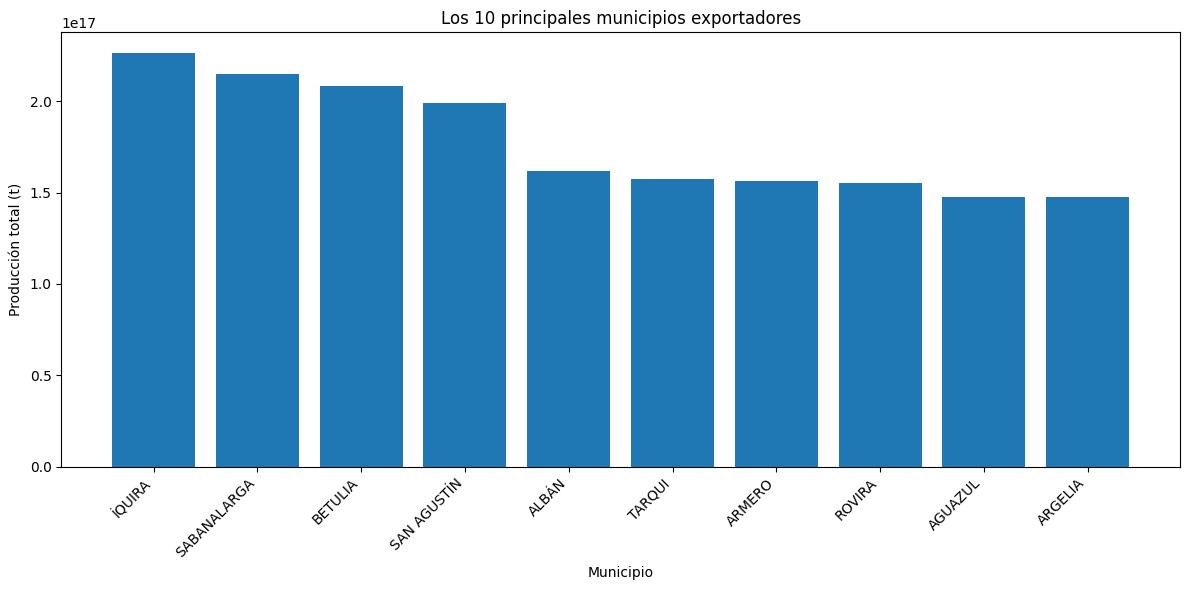

In [31]:
import matplotlib.pyplot as plt
exports_df['Código Dane municipio'] = exports_df['Código Dane municipio'].astype(int)
merged_df = pd.merge(exports_df, municipios_df, left_on='Código Dane municipio', right_on='Cod. Municipio')
municipality_exports = merged_df.groupby('Nombre Municipio')['Producción (t)'].sum().reset_index()
municipality_exports = municipality_exports.sort_values(by='Producción (t)', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(municipality_exports['Nombre Municipio'].head(10), municipality_exports['Producción (t)'].head(10))
plt.xticks(rotation=45, ha='right')
plt.title('Los 10 principales municipios exportadores')
plt.xlabel('Municipio')
plt.ylabel('Producción total (t)')
plt.tight_layout()
plt.show()

Productos

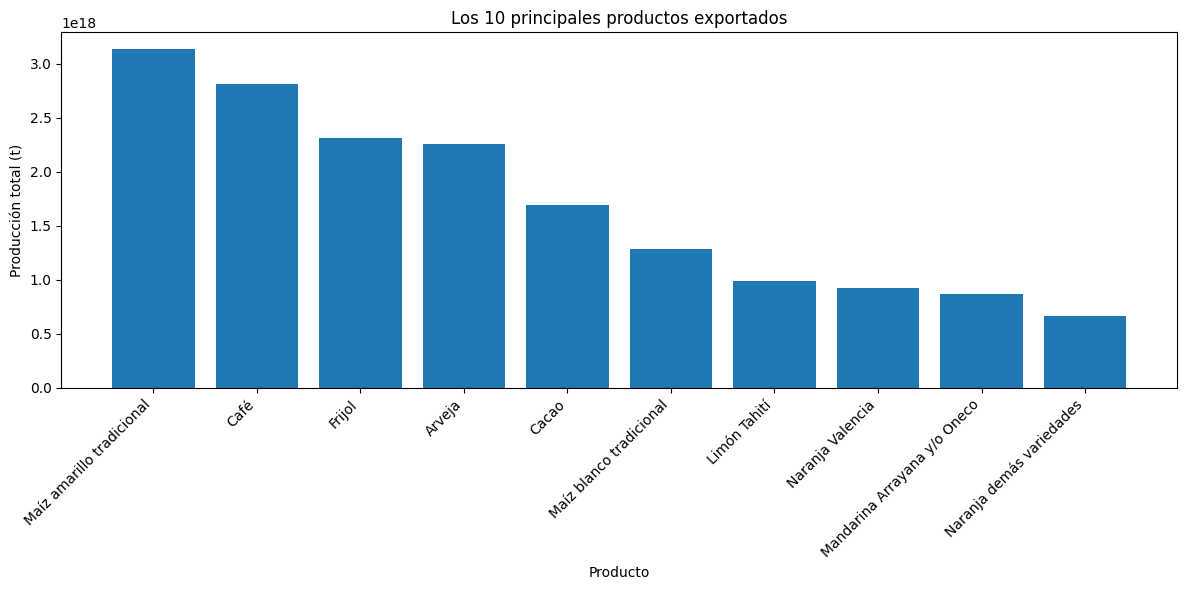

In [34]:
product_exports = merged_df.groupby('Desagregación cultivo')['Producción (t)'].sum().reset_index()
product_exports = product_exports.sort_values(by='Producción (t)', ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(product_exports['Desagregación cultivo'].head(10), product_exports['Producción (t)'].head(10))
plt.xticks(rotation=45, ha='right')
plt.title('Los 10 principales productos exportados')
plt.xlabel('Producto')
plt.ylabel('Producción total (t)')
plt.tight_layout()
plt.show()

El análisis muestra los 10 principales municipios exportadores y los 10 principales productos exportados, estos gráficos de barras nos permiten visualizar claramente los municipios y productos con mayores cantidades de producción.

# Inversiones <a name="id18"></a>
---
Se consultó el "Tejido Empresarial de Colombia" de ProColombia, el cual permite identificar las empresas con sede principal en el municipio identificadas como sucursal de sociedad extranjera en la base del RUES o de Supersociedades.

# Turismo <a name="id19"></a>
---
Se consultó el "Tejido Empresarial de Colombia" de ProColombia, el cual permite identificar las empresas con sede principal en el municipio relacionadas con actividades de turismo según su actividad económica principal.